In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np

In [35]:
tmp_df = pd.read_csv('../../data/processed/Spain/Spain-1950.csv', index_col=0)

In [43]:
tmp_df_neg = tmp_df.copy()

In [44]:
for index, cuerpo in tmp_df_neg.iterrows():
    
    if tmp_df_neg.iloc[index]['Gender'] == 'Male':
        tmp_df_neg.iloc[index] = tmp_df_neg.iloc[index]['Age'], \
            tmp_df_neg.iloc[index]['Count'] * -1, \
                tmp_df_neg.iloc[index]['Gender']
    else:
        pass

In [50]:
get_retired = 0
working = 0

for index, cuerpo in tmp_df.iterrows():
    if tmp_df.iloc[index]['Age'] == '100+':
        get_retired += tmp_df.iloc[index]['Count']
        
    elif int(tmp_df.iloc[index]['Age']) >= 64:
        get_retired += tmp_df.iloc[index]['Count']
        
    elif int(tmp_df.iloc[index]['Age']) < 64 and int(tmp_df.iloc[index]['Age']) >= 18:
        working += tmp_df.iloc[index]['Count']
    

In [52]:
get_retired, working 

(475086, 727268)

In [117]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

array = []

df_final = pd.DataFrame(columns=['Index', 'Retired', 'Working'])

for file in os.listdir("../../data/processed/Spain/"):
    
    tmp_df = pd.read_csv('../../data/processed/Spain/' + file, index_col=0)
    year = file.split('-')[1].split('.')[0]
        
    retired = 0
    working = 0
    
    for index, cuerpo in tmp_df.iterrows():
    
        if tmp_df.iloc[index]['Gender'] == 'Male':
            tmp_df.iloc[index] = tmp_df.iloc[index]['Age'], \
                tmp_df.iloc[index]['Count'] * -1, \
                    tmp_df.iloc[index]['Gender']
        else:
            pass

    for index, cuerpo in tmp_df.iterrows():
        if tmp_df.iloc[index]['Age'] == '100+':
            retired += tmp_df.iloc[index]['Count']
            
        elif int(tmp_df.iloc[index]['Age']) > 64:
            retired += tmp_df.iloc[index]['Count']
            
        elif int(tmp_df.iloc[index]['Age']) <= 64 and int(tmp_df.iloc[index]['Age']) >= 18:
            working += tmp_df.iloc[index]['Count']
            
    df_final = df_final.append({'Index': year, 'Retired': retired, 'Working': working}, ignore_index=True)
    
df_final = df_final.set_index('Index')
df_final.sort_index(inplace=True)

<AxesSubplot:title={'center':'Working vs Retired Ratio'}, xlabel='Index'>

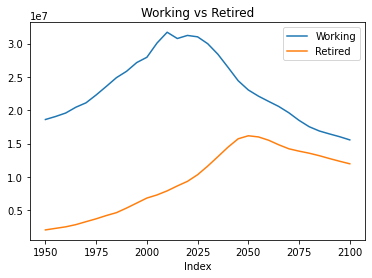

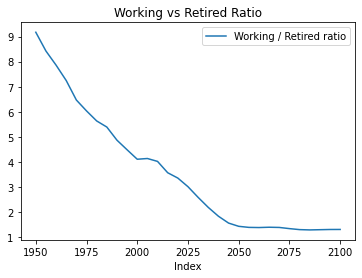

In [125]:
df_final["Working / Retired ratio"] = df_final["Working"]/df_final["Retired"]

df_final.plot(y=["Working", "Retired"], layout=(2,1), title="Working vs Retired")

df_final.plot(y=["Working / Retired ratio"], layout=(2,1), title="Working vs Retired Ratio")

In [123]:
plt.Color = 'red'